In [1]:
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

import utils
import autoencoders

In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


### Util functions

In [3]:
def plot_images(batch, nb_imgs):
    plt.figure(figsize=(20, 4))
    for i in range(nb_imgs):
        ax = plt.subplot(2, nb_imgs, i + 1)
        plt.imshow(batch[i].squeeze())
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

def plot_losses(losses, title='Evaluation losses'):
    plt.plot([i + 1 for i in range(len(losses))], losses, 'red')
    plt.title(title)
    plt.show()

def plot_results(mean_loss, batch_data, nb_imgs=10):
    (x, y, y_hat) = batch_data
    print(f'Mean loss: {round(mean_loss, 4)}')
    print('Input')
    plot_images(x, nb_imgs)
    print('Target')
    plot_images(y, nb_imgs)
    print('Generated')
    plot_images(y_hat, nb_imgs)

# Cifar

In [4]:
(cifar_train, cifar_eval, cifar_test) = utils.load_dataset('cifar')

In [5]:
encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
])

decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3072, activation='sigmoid'),
    tf.keras.layers.Reshape((32, 32, 3))
])

conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
])

conv_decoder = tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(3, kernel_size=(3,3), activation='sigmoid', padding='same')
])

training start
epoch 1/20 - mean loss 0.0284
epoch 2/20 - mean loss 0.0225
epoch 3/20 - mean loss 0.0191
epoch 4/20 - mean loss 0.0177
epoch 5/20 - mean loss 0.0149
epoch 6/20 - mean loss 0.0137
epoch 7/20 - mean loss 0.0124
epoch 8/20 - mean loss 0.0111
epoch 9/20 - mean loss 0.0102
epoch 10/20 - mean loss 0.0096
epoch 11/20 - mean loss 0.0091
epoch 12/20 - mean loss 0.0085
epoch 13/20 - mean loss 0.0081
epoch 14/20 - mean loss 0.0078
epoch 15/20 - mean loss 0.0075
epoch 16/20 - mean loss 0.0072
epoch 17/20 - mean loss 0.0071
epoch 18/20 - mean loss 0.0069
epoch 19/20 - mean loss 0.0068
epoch 20/20 - mean loss 0.0065
training stop


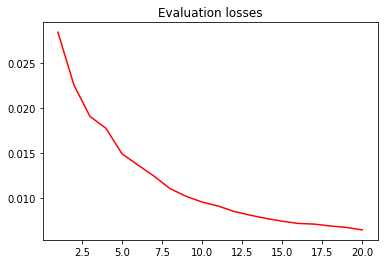

Mean loss: 0.0065
Input


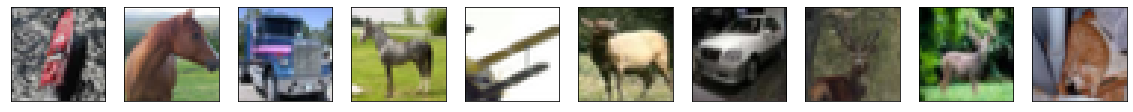

Target


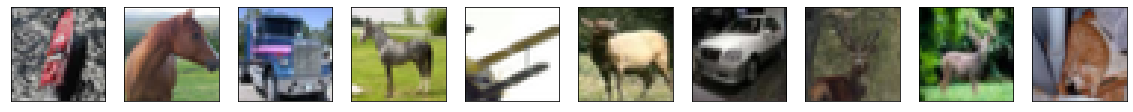

Generated


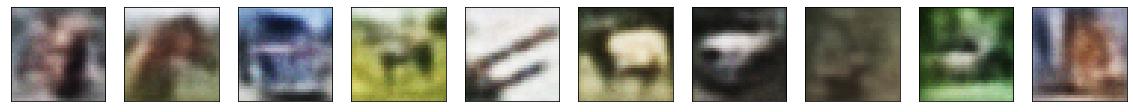

In [6]:
default_cifar_autoencoder = autoencoders.Autoencoder(encoder, decoder)
eval_losses = default_cifar_autoencoder.fit(cifar_train, cifar_eval, epochs=20)
plot_losses(eval_losses)
plot_results(*default_cifar_autoencoder.evaluate(cifar_test))

training start
epoch 1/20 - mean loss 0.0112
epoch 2/20 - mean loss 0.0083
epoch 3/20 - mean loss 0.007
epoch 4/20 - mean loss 0.0064
epoch 5/20 - mean loss 0.006
epoch 6/20 - mean loss 0.0057
epoch 7/20 - mean loss 0.0055
epoch 8/20 - mean loss 0.0054
epoch 9/20 - mean loss 0.0052
epoch 10/20 - mean loss 0.0051
epoch 11/20 - mean loss 0.005
epoch 12/20 - mean loss 0.0049
epoch 13/20 - mean loss 0.0048
epoch 14/20 - mean loss 0.0048
epoch 15/20 - mean loss 0.0047
epoch 16/20 - mean loss 0.0046
epoch 17/20 - mean loss 0.0046
epoch 18/20 - mean loss 0.0045
epoch 19/20 - mean loss 0.0045
epoch 20/20 - mean loss 0.0045
training stop


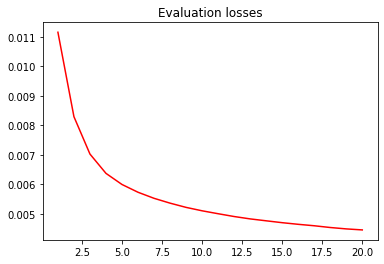

Mean loss: 0.0044
Input


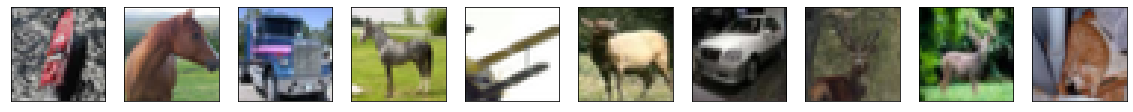

Target


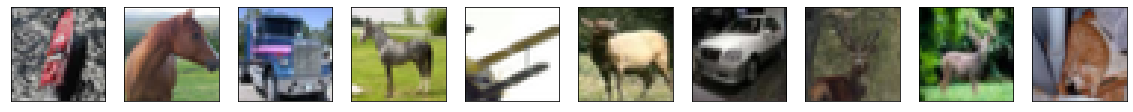

Generated


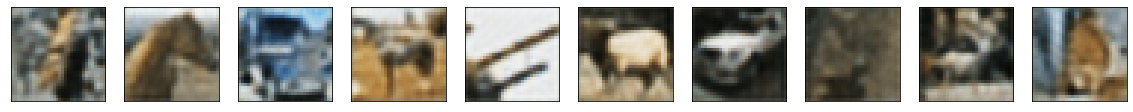

In [7]:
conv_cifar_autoencoder = autoencoders.Autoencoder(conv_encoder, conv_decoder)
eval_losses = conv_cifar_autoencoder.fit(cifar_train, cifar_eval, epochs=20)
plot_losses(eval_losses)
plot_results(*conv_cifar_autoencoder.evaluate(cifar_test))

# Noisy Cifar

In [8]:
(noisy_cifar_train, noisy_cifar_eval, noisy_cifar_test) = utils.load_dataset('noisy_cifar')

In [9]:
encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
])

decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3072, activation='sigmoid'),
    tf.keras.layers.Reshape((32, 32, 3))
])

conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
])

conv_decoder = tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(3, kernel_size=(3,3), activation='sigmoid', padding='same')
])

training start
epoch 1/20 - mean loss 0.0255
epoch 2/20 - mean loss 0.0221
epoch 3/20 - mean loss 0.02
epoch 4/20 - mean loss 0.0179
epoch 5/20 - mean loss 0.017
epoch 6/20 - mean loss 0.0159
epoch 7/20 - mean loss 0.0148
epoch 8/20 - mean loss 0.0139
epoch 9/20 - mean loss 0.0133
epoch 10/20 - mean loss 0.0127
epoch 11/20 - mean loss 0.0123
epoch 12/20 - mean loss 0.0118
epoch 13/20 - mean loss 0.0115
epoch 14/20 - mean loss 0.0111
epoch 15/20 - mean loss 0.0108
epoch 16/20 - mean loss 0.0107
epoch 17/20 - mean loss 0.0105
epoch 18/20 - mean loss 0.0101
epoch 19/20 - mean loss 0.0099
epoch 20/20 - mean loss 0.0097
training stop


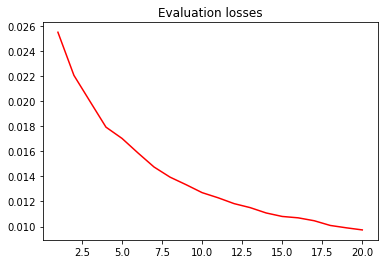

Mean loss: 0.0096
Input


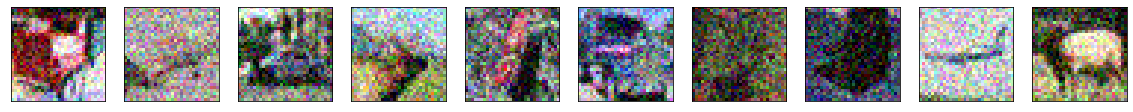

Target


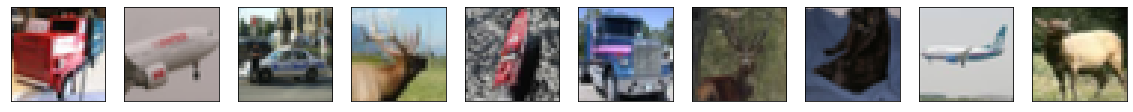

Generated


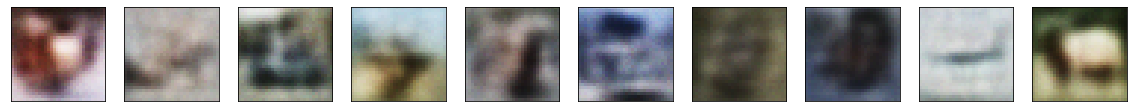

In [10]:
default_noisy_cifar_autoencoder = autoencoders.Autoencoder(encoder, decoder)
eval_losses = default_noisy_cifar_autoencoder.fit(noisy_cifar_train, noisy_cifar_eval, epochs=20)
plot_losses(eval_losses)
plot_results(*default_noisy_cifar_autoencoder.evaluate(noisy_cifar_test))

training start
epoch 1/20 - mean loss 0.0151
epoch 2/20 - mean loss 0.0124
epoch 3/20 - mean loss 0.0113
epoch 4/20 - mean loss 0.01
epoch 5/20 - mean loss 0.0083
epoch 6/20 - mean loss 0.0077
epoch 7/20 - mean loss 0.0074
epoch 8/20 - mean loss 0.0071
epoch 9/20 - mean loss 0.007
epoch 10/20 - mean loss 0.0068
epoch 11/20 - mean loss 0.0067
epoch 12/20 - mean loss 0.0066
epoch 13/20 - mean loss 0.0066
epoch 14/20 - mean loss 0.0065
epoch 15/20 - mean loss 0.0064
epoch 16/20 - mean loss 0.0064
epoch 17/20 - mean loss 0.0064
epoch 18/20 - mean loss 0.0063
epoch 19/20 - mean loss 0.0063
epoch 20/20 - mean loss 0.0062
training stop


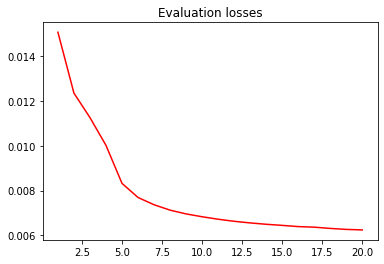

Mean loss: 0.0061
Input


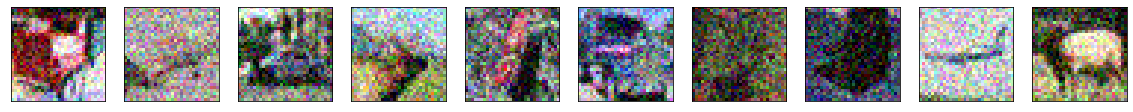

Target


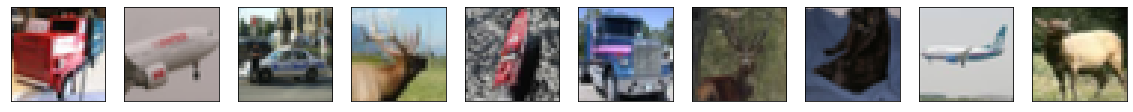

Generated


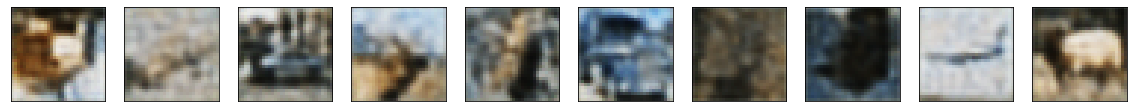

In [11]:
conv_noisy_cifar_autoencoder = autoencoders.Autoencoder(conv_encoder, conv_decoder)
eval_losses = conv_noisy_cifar_autoencoder.fit(noisy_cifar_train, noisy_cifar_eval, epochs=20)
plot_losses(eval_losses)
plot_results(*conv_noisy_cifar_autoencoder.evaluate(noisy_cifar_test))